In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from main import NPHC
from scipy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'exp_d10'
mode = 'nonsym_1_hard'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


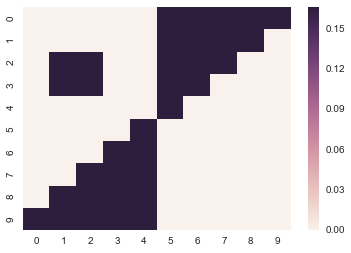

In [3]:
sns.heatmap(Alpha[::-1])

In [4]:
# Params
learning_rate = 1e5
training_epochs = 5001
display_step = 10
d = cumul.dim

In [5]:
_, s, _ = np.linalg.svd(cumul.C)
lbd_max = s[0]
#initial = tf.ones([d,d])
initial = tf.constant(inv(np.eye(d) - cumul.C / (10.*lbd_max)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

R = NPHC(cumul,initial,alpha=0.1,training_epochs=training_epochs,stochastic=True,\
         display_step=display_step,learning_rate=1e-2,optimizer='adagrad')

TypeError: x and y must have the same dtype, got tf.float32 != tf.float64

In [ ]:
list_R = []
l_r = learning_rate
_, s, _ = np.linalg.svd(cumul.C)
lbd_max = s[0]
#initial = tf.ones([d,d])
initial = tf.constant(inv(np.eye(d) - cumul.C / (1.1*lbd_max)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

alpha_arr = np.append(np.logspace(0,-5,6),0)

for i, alpha in enumerate(alpha_arr):
    print("alpha =", alpha)
    if i == 0: R_init = initial
    if i > 1: 
        l_r = learning_rate
        training_epochs *= 2
    R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,\
     learning_rate=l_r,display_step=display_step,optimizer='adam')
    list_R.append(R)
    R_init = R.copy()

In [211]:
#alpha = 0.01
#R_init = initial
#R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,\
#     learning_rate=learning_rate,display_step=display_step,optimizer='adam')

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


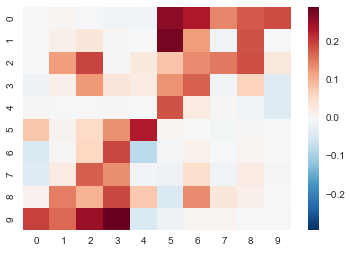

In [29]:
from scipy.linalg import inv
#R = list_R[-1]
G = np.eye(R.shape[0]) - inv(R)
#G[G<0]=0
sns.heatmap(G[::-1])

In [96]:
#np.logspace(0,-10,11)